In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/drive/MyDrive/portfolio/retail sales/fashion_boutique_dataset.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.3+ KB


In [8]:
data.isnull().sum()

,0
product_id,0
category,0
brand,0
season,0
size,491
color,0
original_price,0
markdown_percentage,0
current_price,0
purchase_date,0


In [9]:
data.describe()

,original_price,markdown_percentage,current_price,stock_quantity,customer_rating
count,2176.000000,2176.000000,2176.000000,2176.000000,1814.000000
mean,97.200340,12.144715,85.499596,24.937960,2.986604
std,51.637345,18.417786,50.091354,14.451387,1.159722
min,15.140000,0.000000,7.290000,0.000000,1.000000
25%,57.872500,0.000000,46.845000,13.000000,2.000000
50%,88.600000,0.000000,74.885000,25.000000,3.000000
75%,127.630000,22.425000,112.865000,37.000000,4.000000
max,249.980000,59.900000,249.980000,50.000000,5.000000


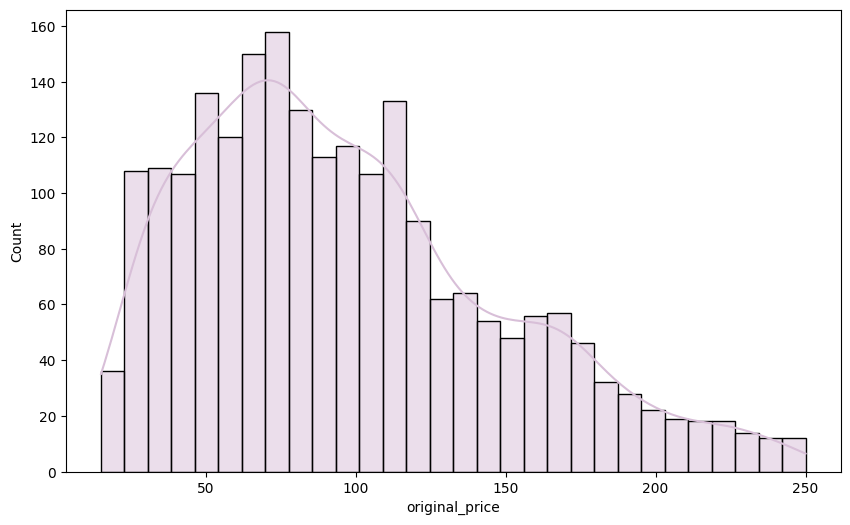

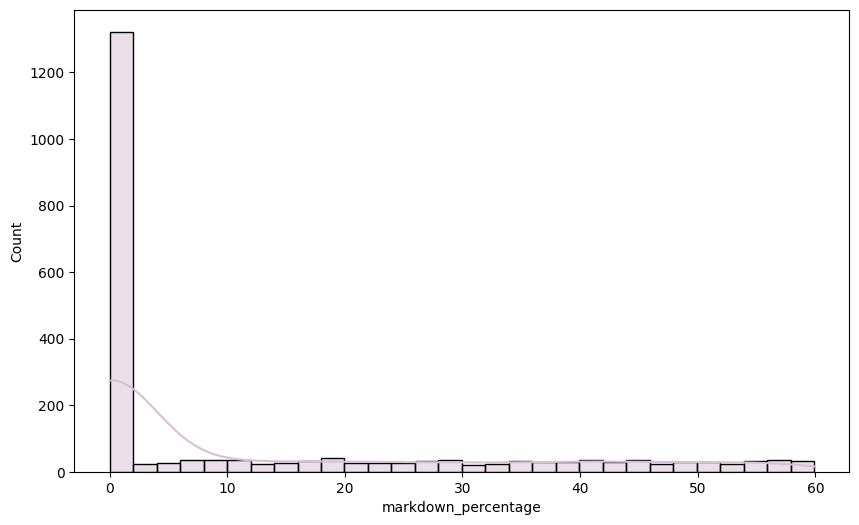

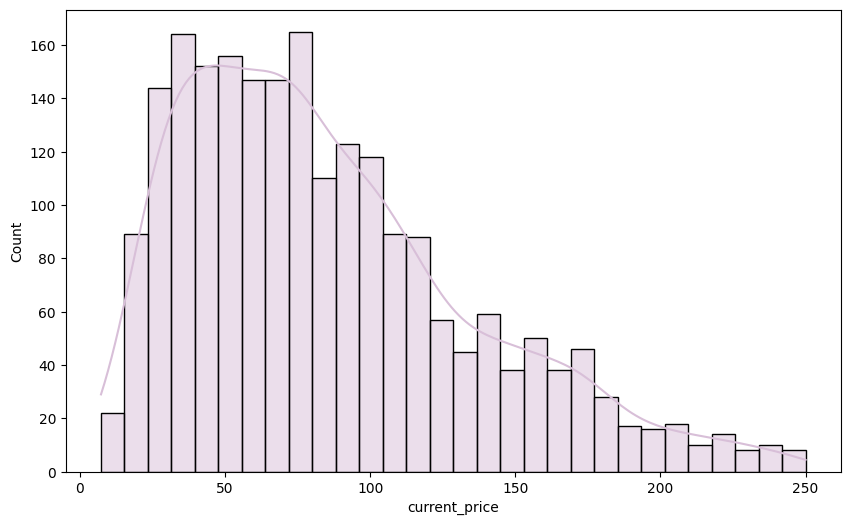

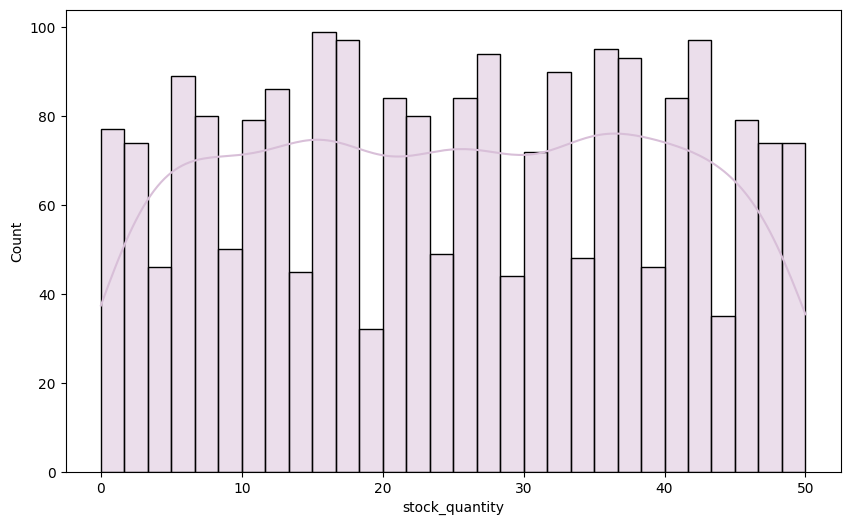

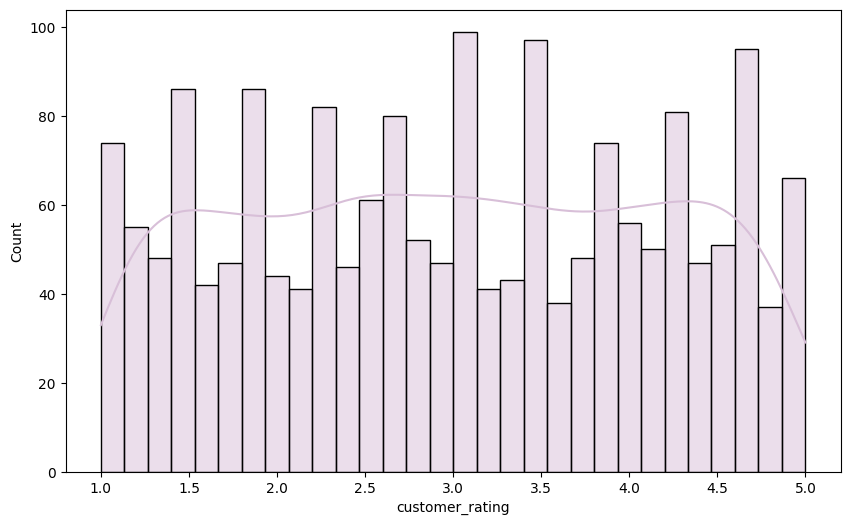

In [37]:
#Visualising numeric columns:
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns


for col in numeric_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data[col], bins=30, kde=True, color='thistle')

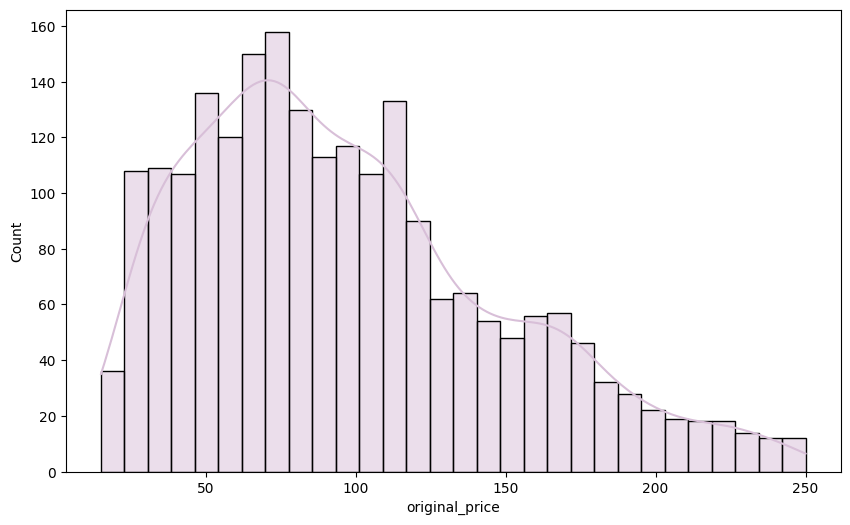

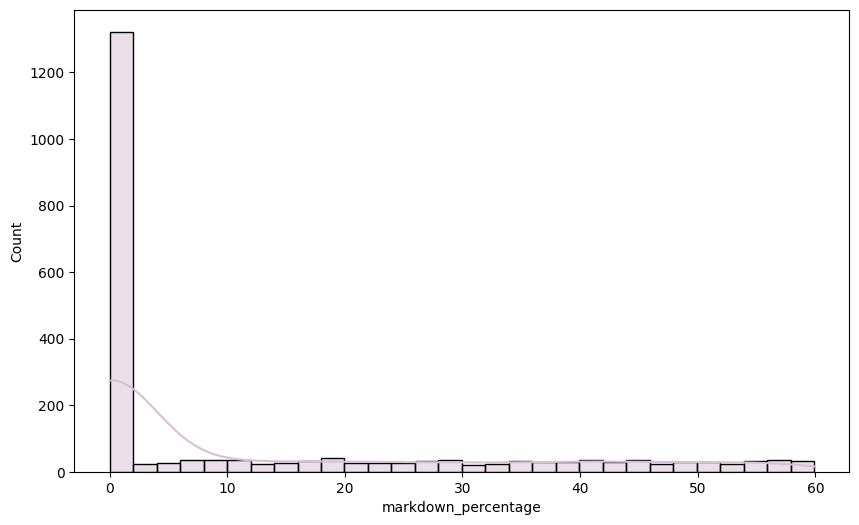

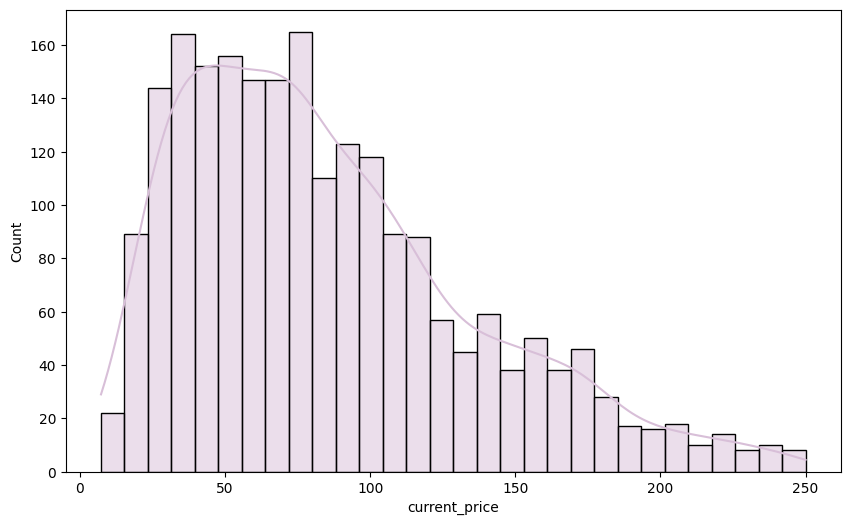

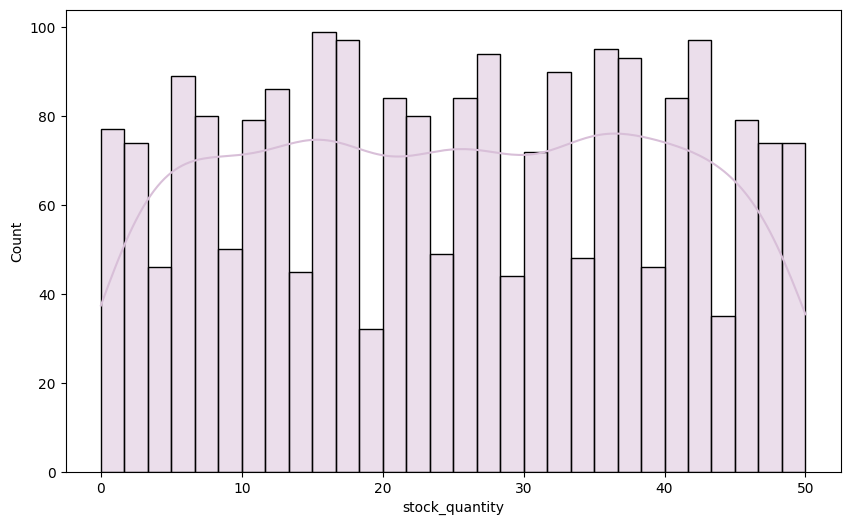

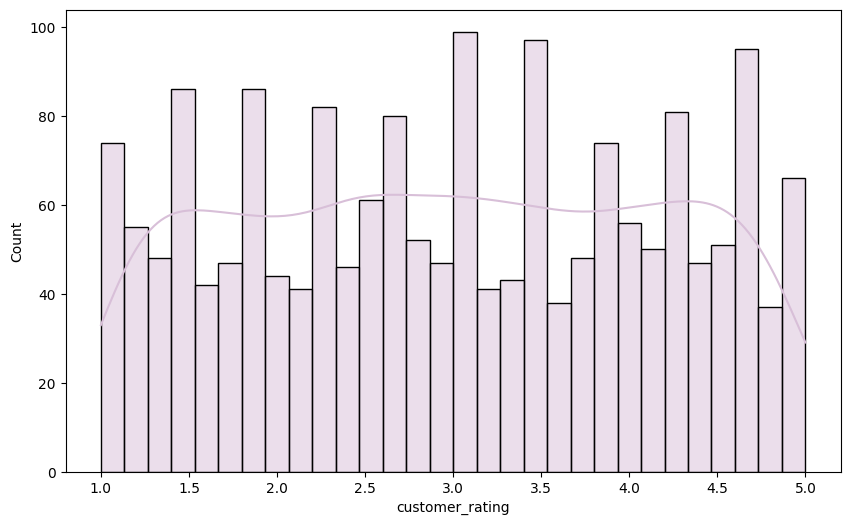

In [35]:
#Histograms without nulls

for col in numeric_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data[col].dropna(), bins=30, kde=True, color='thistle')

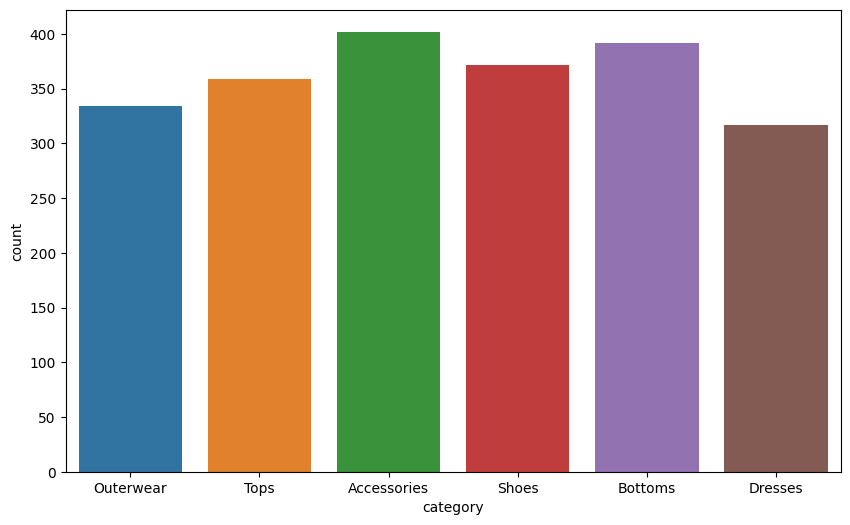

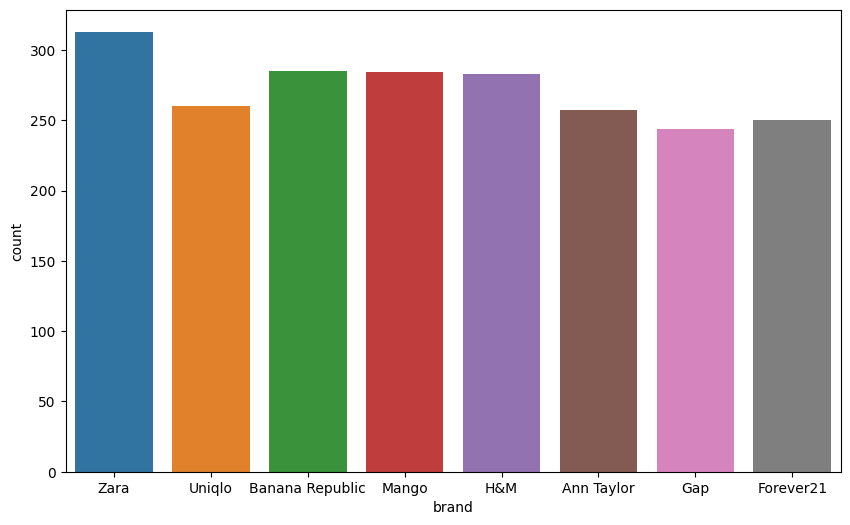

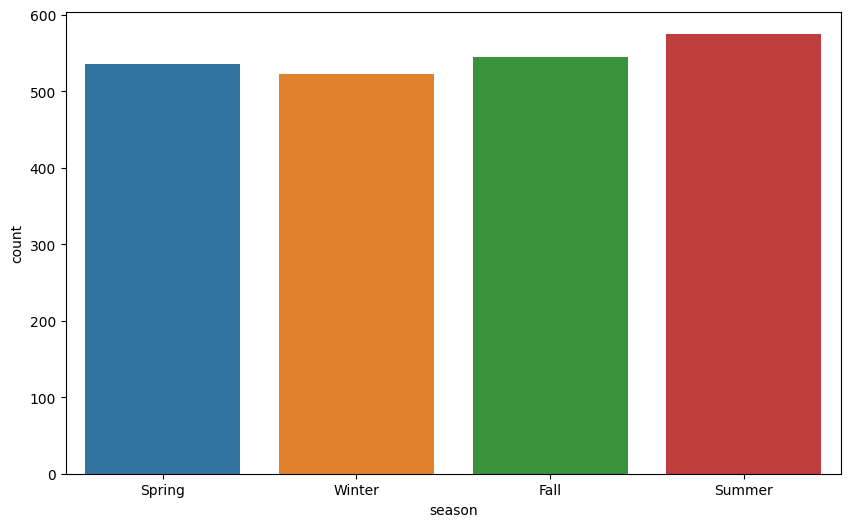

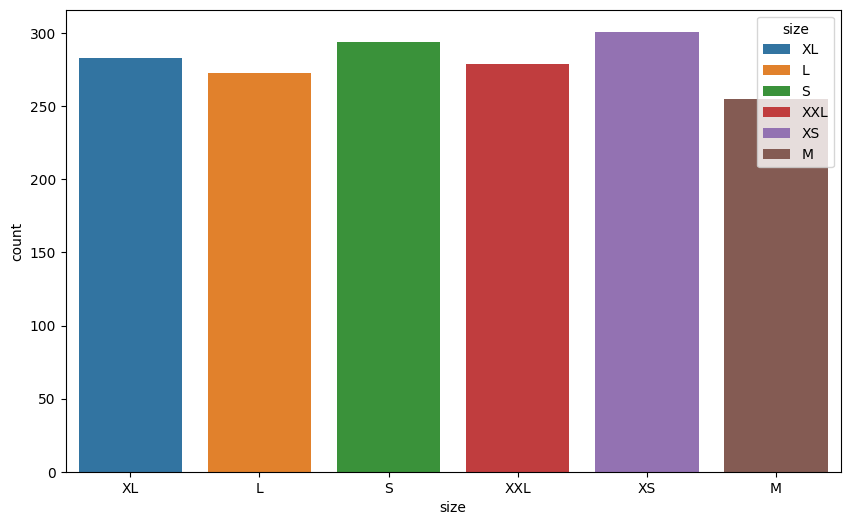

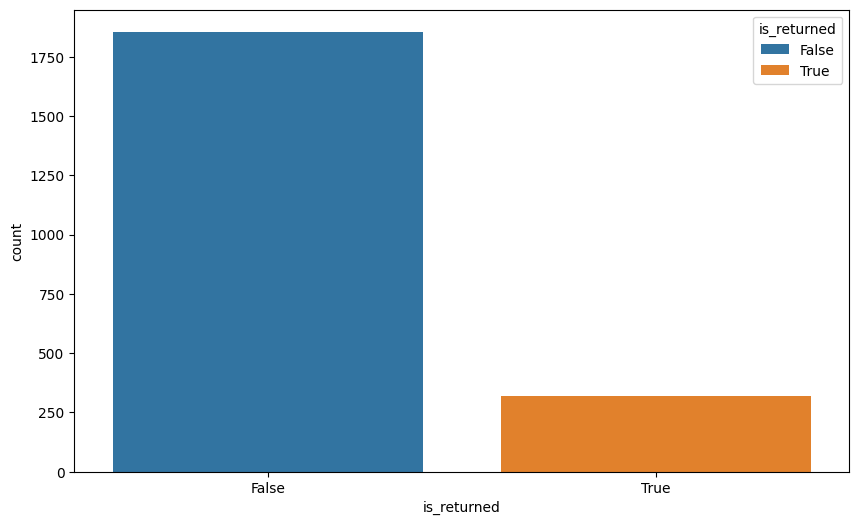

In [40]:
#Visualizing categorical columns:

categorical_columns = ['category', 'brand', 'season', 'size', 'is_returned']

for col in categorical_columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=data, x=col, hue = col)
  plt.show();


In [45]:
data['color'].unique()

color_map = {
    'Red': 'red',
    'Pink': 'pink',
    'Black': 'black',
    'White': 'white',
    'Gray': 'gray',
    'Blue': 'blue',
    'Green': 'green',
    'Beige': 'beige',
    'Navy': 'navy',
    'Purple': 'purple',
    'Brown': 'brown'
}


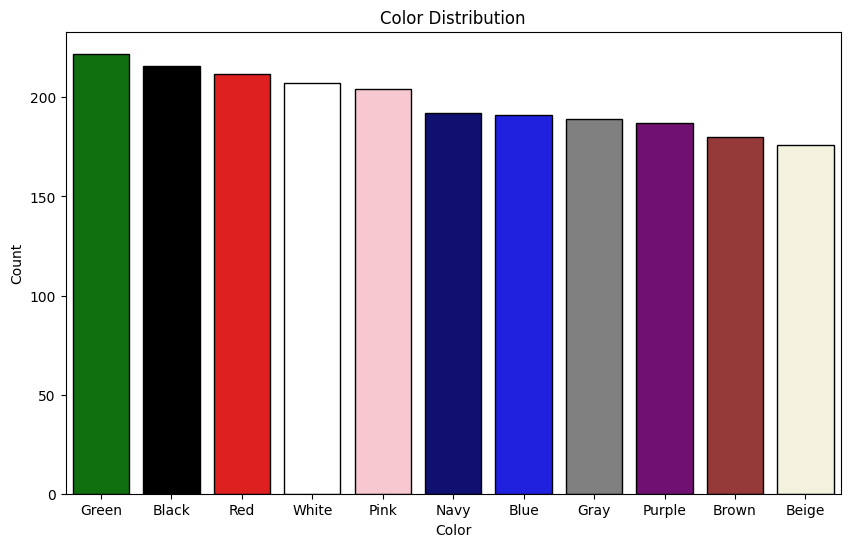

In [53]:
#Separate Colour Visualisation with mapped colours:

plt.figure(figsize=(10, 6))
sns.countplot(data=data,
              x='color',
              hue='color',
              order = data['color'].value_counts().index,
              palette=color_map,
              edgecolor='black')
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show();

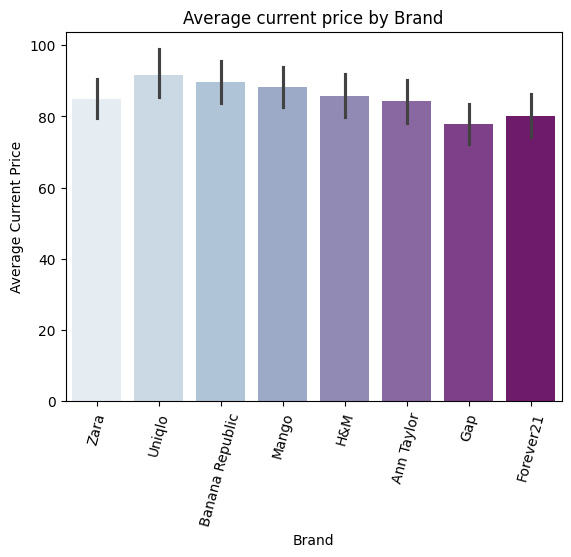

In [61]:
#Average current price by brand

sns.barplot(data=data, x='brand', y='current_price', palette='BuPu')
plt.xticks(rotation=90)
plt.title('Average current price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Current Price')
plt.xticks(rotation=75)
plt.show();

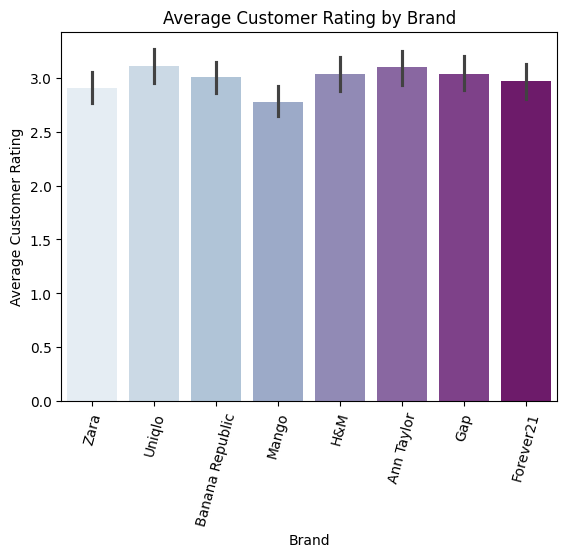

In [65]:
#Average customer rating by Brand

sns.barplot(data=data, x='brand', y='customer_rating', palette='BuPu')
plt.title('Average Customer Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Customer Rating')
plt.xticks(rotation=75)
plt.show;

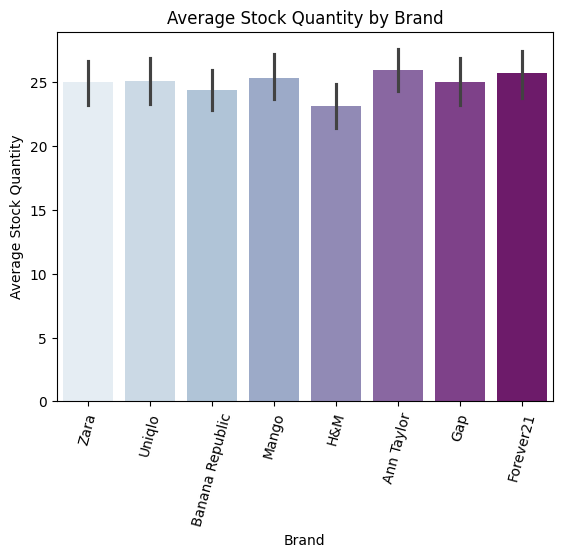

In [68]:
#Average Stock Quantity by Brand

sns.barplot(data=data, x='brand', y='stock_quantity', palette='BuPu')
plt.title('Average Stock Quantity by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Stock Quantity')
plt.xticks(rotation=75)
plt.show;

In [70]:
#Table of Is returned for each Brand

pd.crosstab(data['brand'], data['is_returned'])

is_returned,False,True
brand,,
Ann Taylor,206,51
Banana Republic,238,47
Forever21,216,34
Gap,208,36
H&M,244,39
Mango,252,32
Uniqlo,227,33
Zara,265,48


([0, 1, 2, 3],
 [Text(0, 0, 'Spring'),
  Text(1, 0, 'Winter'),
  Text(2, 0, 'Fall'),
  Text(3, 0, 'Summer')])

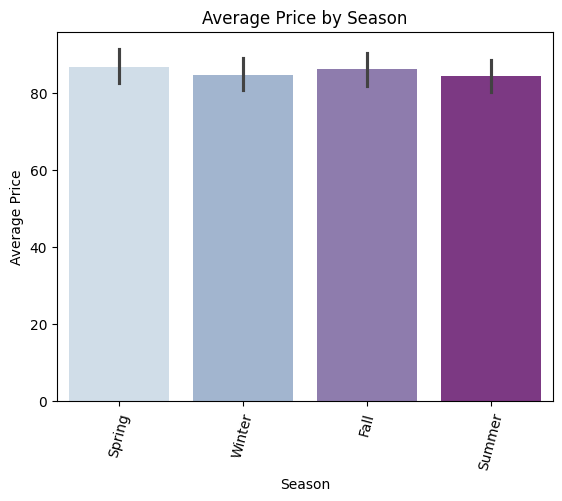

In [75]:
#Average price by season

sns.barplot(data=data, x='season', y='current_price', palette='BuPu')
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.xticks(rotation=75)